In [1]:
!git clone https://github.com/ChaoningZhang/MobileSAM.git

Cloning into 'MobileSAM'...


In [1]:
%cd MobileSAM

c:\Users\DELL-PC\Desktop\BJY\MobileSAM\MobileSAM


In [2]:
!pip install -e .

Obtaining file:///C:/Users/DELL-PC/Desktop/BJY/MobileSAM/MobileSAM
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: mobile_sam
    Found existing installation: mobile_sam 1.0
    Uninstalling mobile_sam-1.0:
      Successfully uninstalled mobile_sam-1.0
  Running setup.py develop for mobile_sam


In [3]:
!pip install timm

     ---------------------------------------- 0.0/43.6 kB ? eta -:--:--
     -------------------------- ----------- 30.7/43.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 43.6/43.6 kB 529.1 kB/s eta 0:00:00
  Using cached huggingface_hub-0.23.0-py3-none-any.whl.metadata (12 kB)
  Using cached safetensors-0.4.3-cp38-none-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.3 MB 2.3 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/2.3 MB 1.7 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.3 MB 2.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.6/2.3 MB 3.5 MB/s eta 0:00:01
   ----------------- ---------------------- 1.0/2.3 MB 4.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.6/2.3 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  2.3/2.3 MB 6.9 MB/s eta 0:00:01
   -----------------

In [2]:
%cd ..

c:\Users\DELL-PC\Desktop\BJY\MobileSAM


In [3]:
%pwd

'c:\\Users\\DELL-PC\\Desktop\\BJY\\MobileSAM'

In [4]:
### wget 은 Linux 명령어. Windows 커맨드창에서는 실행되지 않는다.
### 해당 주소에 접속하여 사진을 저장하면 된다.
# !wget http://images.cocodataset.org/val2017/000000039769.jpg

In [5]:
from urllib.request import urlretrieve
import os

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
urlretrieve(url, './two_cats.jpg')

('./two_cats.jpg', <http.client.HTTPMessage at 0x2219e0168e0>)

In [6]:
import cv2

image = cv2.imread('./two_cats.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

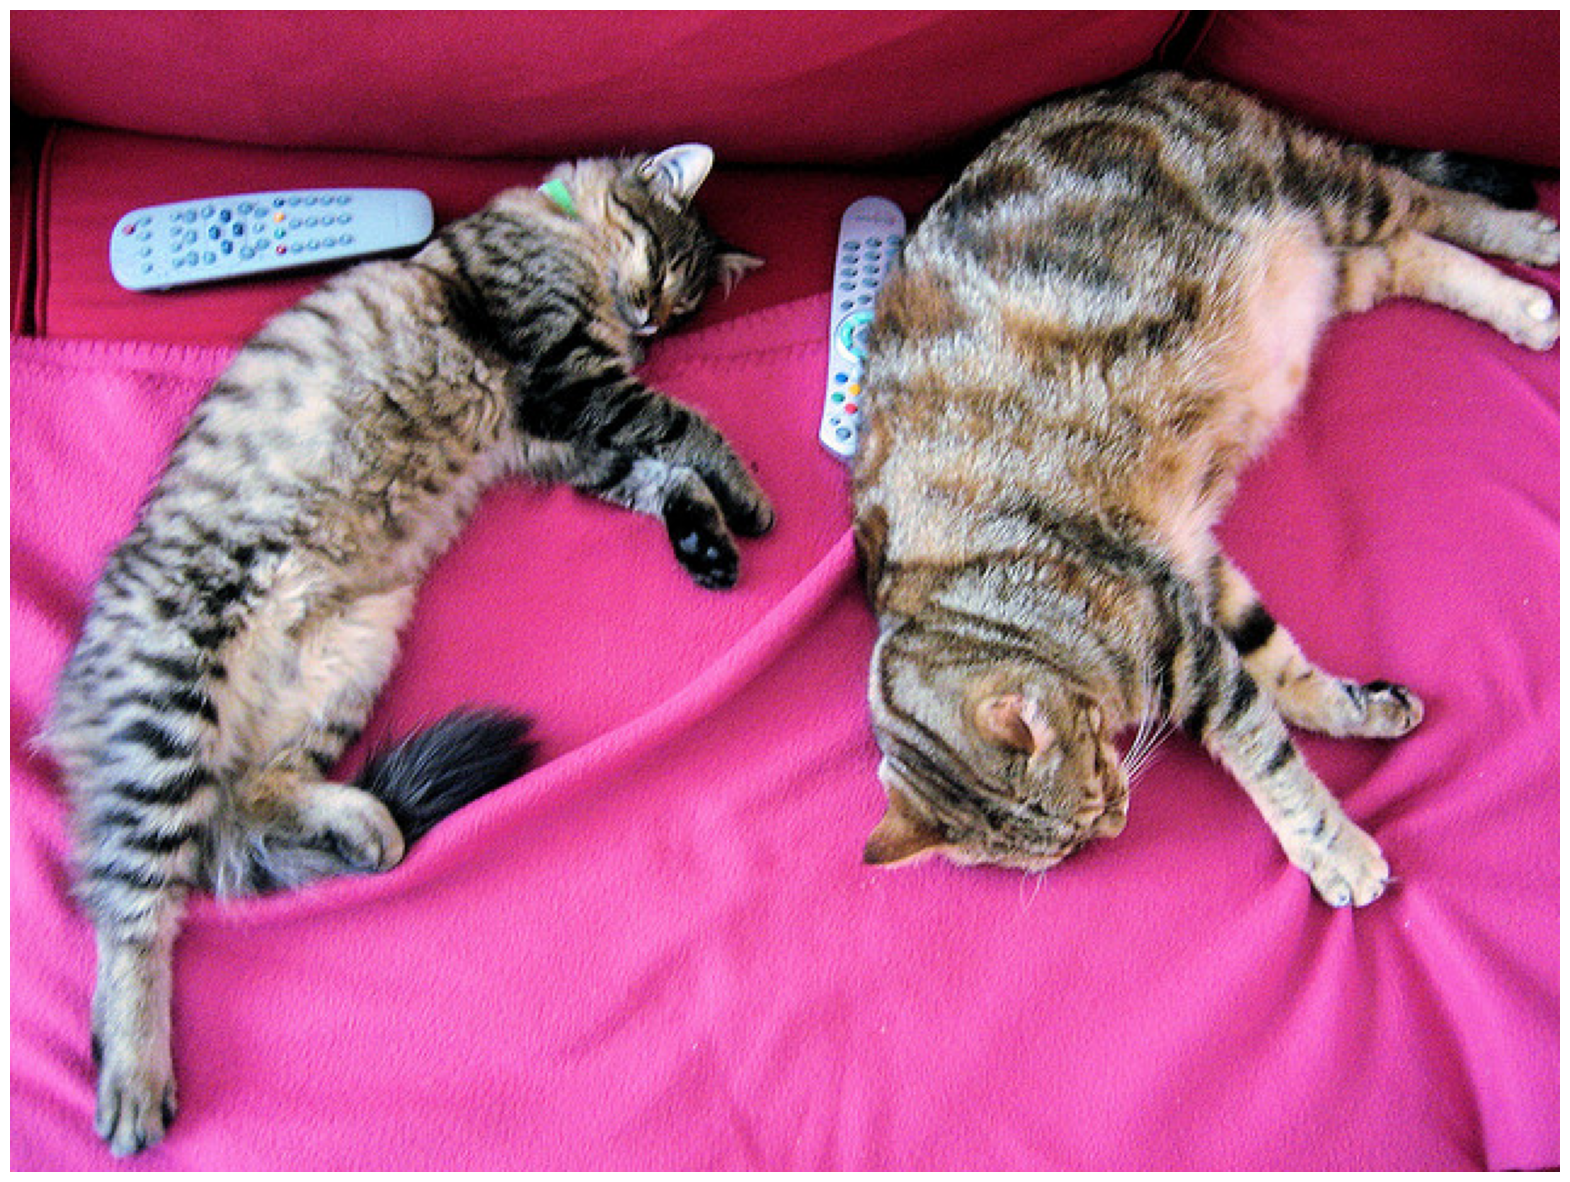

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
from mobile_sam import sam_model_registry
import torch

model_type = "vit_t"
sam_checkpoint = "./MobileSAM/weights/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()

c:\Users\DELL-PC\miniconda3\envs\MNV\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\users\dell-pc\desktop\bjy\mobilesam\mobilesam\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\users\dell-pc\desktop\bjy\mobilesam\mobilesam\mobile_sam\modeling\tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
c:\users\dell-pc\desktop\bjy\mobilesam\mobil

Sam(
  (image_encoder): TinyViT(
    (patch_embed): PatchEmbed(
      (seq): Sequential(
        (0): Conv2d_BN(
          (c): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): GELU(approximate='none')
        (2): Conv2d_BN(
          (c): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
    (layers): ModuleList(
      (0): ConvLayer(
        (blocks): ModuleList(
          (0-1): 2 x MBConv(
            (conv1): Conv2d_BN(
              (c): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (act1): GELU(approximate='none')
            (conv2): Conv2d_BN(
 

In [9]:
### 약 2분 가량 소요됨
from mobile_sam import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(mobile_sam)
masks = mask_generator.generate(image)  # list

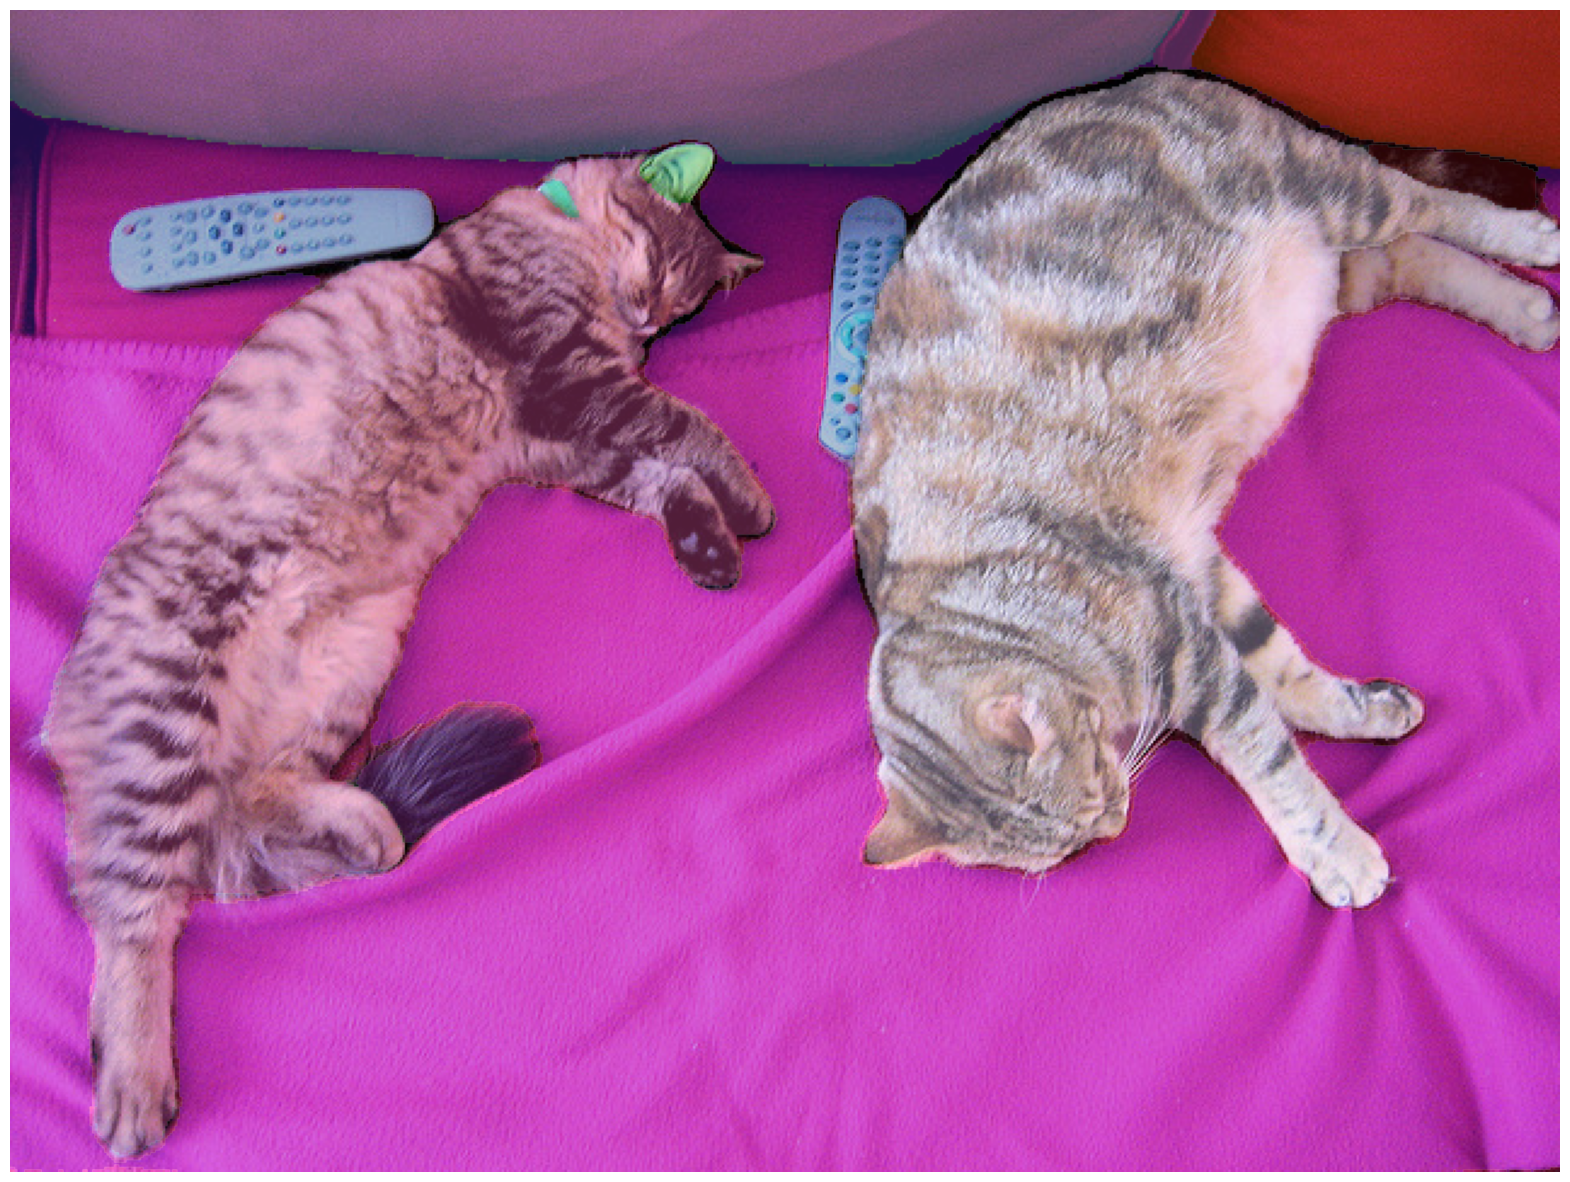

In [10]:
import numpy as np

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [11]:
print(len(masks))
print(masks[0].keys())

15
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [12]:
masks[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 57726,
 'bbox': [348, 26, 291, 344],
 'predicted_iou': 1.027817726135254,
 'point_coords': [[530.0, 352.5]],
 'stability_score': 0.9735665321350098,
 'crop_box': [0, 0, 640, 480]}